# PROJECT - 20

# SOCIAL NETWORK ADVERTISEMENT

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings ("ignore")

In [287]:
social=pd.read_csv("social.csv")
social.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [288]:
social.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [289]:
social.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [290]:
social.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


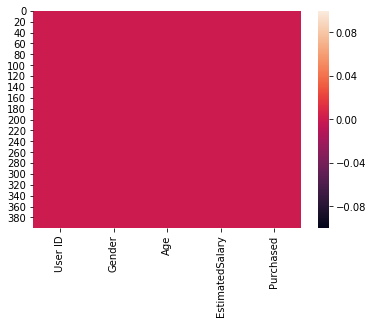

In [291]:
sns.heatmap(social.isnull())

In [292]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le_count=0
for col in social.columns[1:]:
   if social[col].dtype=='object':
    if len(list(social[col].unique()))<=2:
        le.fit(social[col])
        social[col]=le.transform(social[col])
        le_count +=1
print('{} columns were label encoded.',format(le_count))

{} columns were label encoded. 1


In [293]:
social=pd.get_dummies(social)
social

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
5,15728773,1,27,58000,0
6,15598044,0,27,84000,0
7,15694829,0,32,150000,1
8,15600575,1,25,33000,0
9,15727311,0,35,65000,0


In [294]:
social.dtypes

User ID            int64
Gender             int32
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

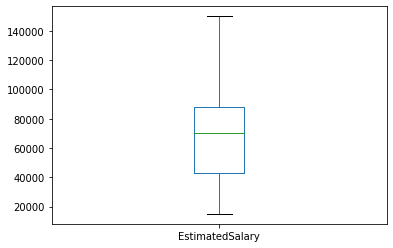

In [295]:
social["EstimatedSalary"].plot.box()

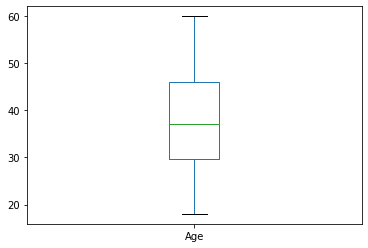

In [296]:
social["Age"].plot.box()

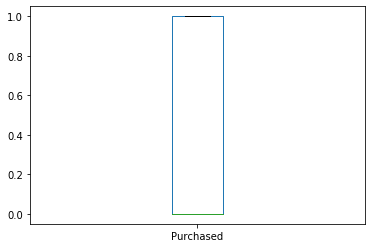

In [298]:
social["Purchased"].plot.box()

# VISUALIZATION

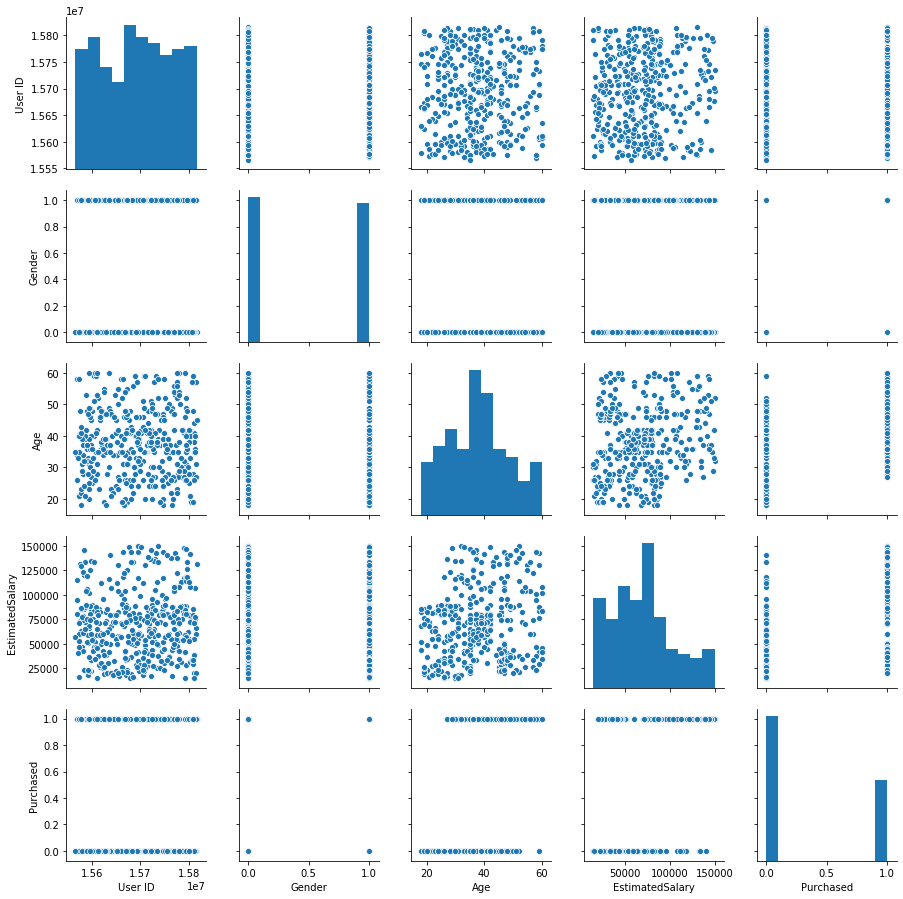

In [299]:
sns.pairplot(social)

In [202]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
social=scaler.fit_transform(social.astype(float))
social

array([[0.23263608, 1.        , 0.02380952, 0.02962963, 0.        ],
       [0.98273164, 1.        , 0.4047619 , 0.03703704, 0.        ],
       [0.40992649, 0.        , 0.19047619, 0.20740741, 0.        ],
       ...,
       [0.35247659, 0.        , 0.76190476, 0.03703704, 1.        ],
       [0.75771987, 1.        , 0.42857143, 0.13333333, 0.        ],
       [0.1100476 , 0.        , 0.73809524, 0.15555556, 1.        ]])

In [203]:
df=pd.DataFrame(social)
df.head()

,0,1,2,3,4
0,0.232636,1.0,0.023810,0.029630,0.0
1,0.982732,1.0,0.404762,0.037037,0.0
2,0.409926,0.0,0.190476,0.207407,0.0
3,0.147083,0.0,0.214286,0.311111,0.0
4,0.954801,1.0,0.023810,0.451852,0.0


In [205]:
df.corr()

,0,1,2,3,4
0,1.000000,-0.025249,-0.000721,0.071097,0.007120
1,-0.025249,1.000000,-0.073741,-0.060435,-0.042469
2,-0.000721,-0.073741,1.000000,0.155238,0.622454
3,0.071097,-0.060435,0.155238,1.000000,0.362083
4,0.007120,-0.042469,0.622454,0.362083,1.000000


# TRAINING AND TESTING PHASE

In [206]:
x=df.drop(4,axis=1)
x.head()

,0,1,2,3
0,0.232636,1.0,0.023810,0.029630
1,0.982732,1.0,0.404762,0.037037
2,0.409926,0.0,0.190476,0.207407
3,0.147083,0.0,0.214286,0.311111
4,0.954801,1.0,0.023810,0.451852


In [207]:
y=df[4]
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      1.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     1.0
17     1.0
18     1.0
19     1.0
20     1.0
21     1.0
22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
27     1.0
28     0.0
29     0.0
      ... 
370    1.0
371    1.0
372    0.0
373    1.0
374    0.0
375    1.0
376    0.0
377    0.0
378    1.0
379    1.0
380    0.0
381    1.0
382    1.0
383    1.0
384    1.0
385    1.0
386    1.0
387    0.0
388    1.0
389    1.0
390    1.0
391    1.0
392    1.0
393    1.0
394    0.0
395    1.0
396    1.0
397    1.0
398    0.0
399    1.0
Name: 4, Length: 400, dtype: float64

In [272]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.10,random_state=0)

In [273]:
lg=LogisticRegression()

In [274]:
print(x_train.shape)

(360, 4)


In [275]:
print(x_test.shape)

(40, 4)


In [276]:
print(y_train.shape)

(360,)


In [277]:
print(y_test.shape)

(40,)


In [278]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [279]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [280]:
predlg=lg.predict(x_test)

In [281]:
print(accuracy_score(y_test,predlg))

0.975


In [282]:
print(confusion_matrix(y_test,predlg))

[[32  0]
 [ 1  7]]


In [283]:
print(classification_report(y_test,predlg))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        32
         1.0       1.00      0.88      0.93         8

    accuracy                           0.97        40
   macro avg       0.98      0.94      0.96        40
weighted avg       0.98      0.97      0.97        40



# CROSS VALIDATION SCORE

In [301]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [332]:
lg=LogisticRegression()
score=cross_val_score(lg,x,y,cv=6)

print('F1-Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred=cross_val_predict(lg,x,y,cv=5)
print('Y Prediction values')
print(y_pred)
cm=confusion_matrix(y,y_pred)
cm

F1-Score= [0.64179104 0.88059701 0.95522388 0.88059701 0.73134328 0.76923077]
Mean Scores 0.8097971680061232
Standard Deviation 0.1058307355451526
Y Prediction values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 1. 1. 1. 1.

array([[240,  17],
       [ 57,  86]], dtype=int64)

In [306]:
SVM=SVC()
score=cross_val_score(SVM,x,y,cv=5,scoring='accuracy')

print('Accuracy =',score)
print('Mean Score',score.mean())
print('Standard Deviation',score.std())

y_pred=cross_val_predict(SVM,x,y,cv=6)
print('Y Predicted values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

Accuracy = [0.66666667 0.95061728 0.9125     0.81012658 0.75949367]
Mean Score 0.8198808407563682
Standard Deviation 0.10284616203190733
Y Predicted values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1

0.825

In [330]:
dtc=DecisionTreeClassifier()
score=cross_val_score(dtc,x,y,cv=6)
    
print("F1 Score",score)
print("Mean Scores",score.mean())
print("Standard Deviation",score.std())

y_pred=cross_val_predict(dtc,x,y,cv=5)
print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

F1 Score [0.85074627 0.89552239 0.91044776 0.8358209  0.70149254 0.78461538]
Mean Scores 0.8297742058936088
Standard Deviation 0.0704780598105006
Y Prediction values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 

0.81

In [329]:
mnb=MultinomialNB()

score=cross_val_score(mnb,x,y,cv=6)
print("Score:",score)

print('Mean scores:',score.mean())
print('Standard Deviation',score.std())

y_pred=cross_val_predict(mnb,x,y,cv=6)
print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

Score: [0.64179104 0.64179104 0.64179104 0.64179104 0.64179104 0.64615385]
Mean scores: 0.6425181783390738
Standard Deviation 0.0016259200754878184
Y Prediction values
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

0.6425

# MODEL SAVING

In [334]:
#model saving
from sklearn.externals import joblib
joblib.dump(SVM,"social.pkl")

['social.pkl']